# Setup and Load Data

In [1]:
import tensorflow as tf 
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
os.listdir(os.path.join(data_dir,'Happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '613k1XcpYCL.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81Vk4C.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg',
 'afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog-2.jpeg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png',
 'dv2

In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Not in List{}',format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue With image{}',format(image_path))

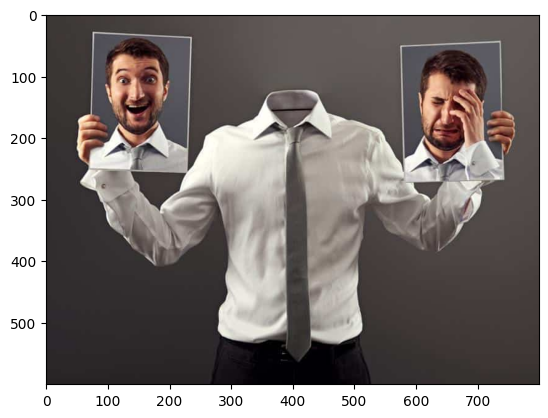

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

## Load Data

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [12]:
#another batch from the iterator
batch = data_iterator.next()

In [13]:
batch[1]

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [14]:
batch[0].shape #one time 32 images selected for processing

(32, 256, 256, 3)

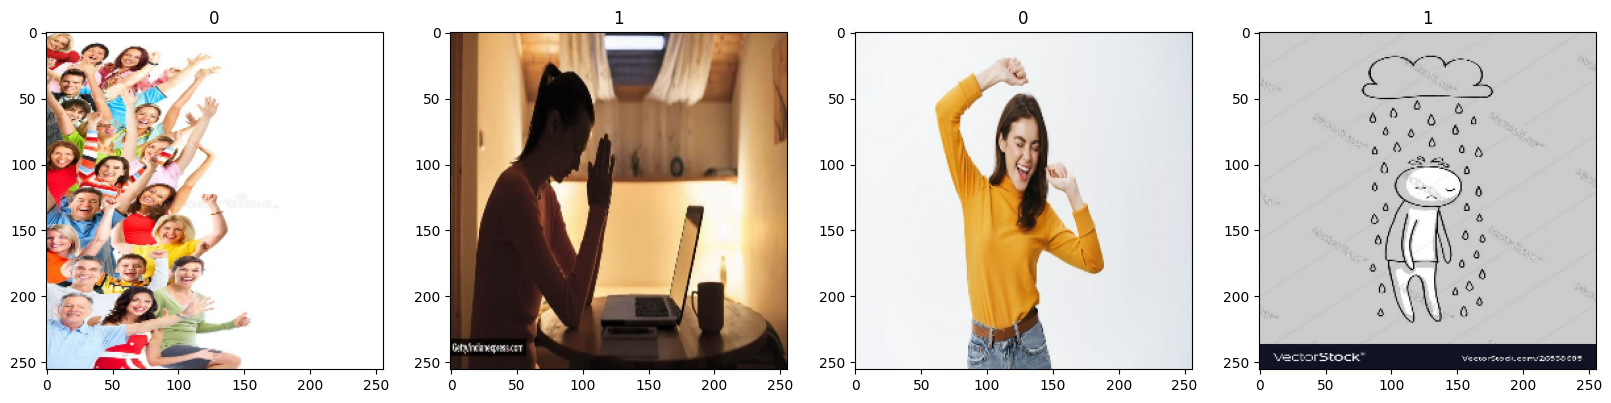

In [15]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [16]:
data = data.map(lambda x,y:(x/255,y))

In [17]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

In [19]:
batch[0].max()

1.0

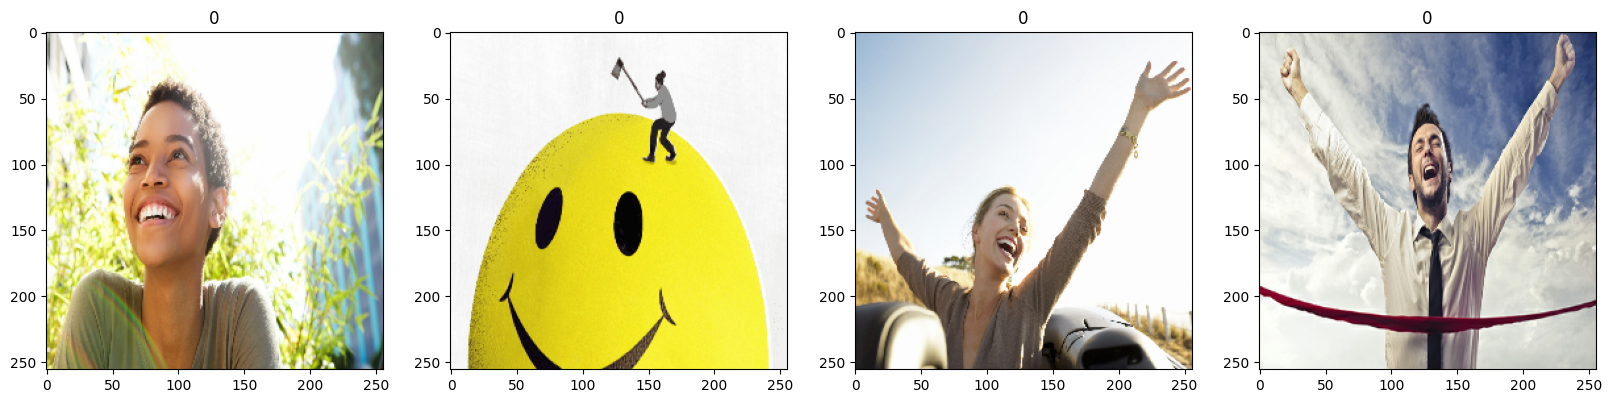

In [20]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### scalling 

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [22]:
train_size

3

In [23]:
test_size+val_size+train_size

6

In [24]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)  
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(test),len(val),len(train)

(0, 2, 3)

# Deep Model

 ### Build Deep Learning Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [27]:
model= Sequential()

In [28]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile('adam',
             loss=tf.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
host = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 9s 2s/step - loss: 0.8763 - accuracy: 0.5938 - val_loss: 0.6762 - val_accuracy: 0.6406
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6976 - accuracy: 0.5417 - val_loss: 0.6794 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.6419 - accuracy: 0.5312 - val_loss: 0.6999 - val_accuracy: 0.5312
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.6478 - accuracy: 0.5625 - val_loss: 0.5588 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.5760 - accuracy: 0.6146 - val_loss: 0.5432 - val_accuracy: 0.6406
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.5678 - accuracy: 0.6146 - val_loss: 0.5067 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.4732 - accuracy: 0.6771 - val_loss: 0.4839 - val_accuracy: 0.7031
Epoch 8/20
3/3 [=========================

 ### Plot Performance

In [34]:
host.history

{'loss': [0.8762733340263367,
  0.6976200938224792,
  0.6418983340263367,
  0.6477941274642944,
  0.5760253071784973,
  0.5678011178970337,
  0.47316381335258484,
  0.4744955003261566,
  0.43086346983909607,
  0.3571782112121582,
  0.32647714018821716,
  0.34992924332618713,
  0.3135758936405182,
  0.3028974235057831,
  0.27924177050590515,
  0.23082439601421356,
  0.16622884571552277,
  0.13221891224384308,
  0.1537286788225174,
  0.12115363031625748],
 'accuracy': [0.59375,
  0.5416666865348816,
  0.53125,
  0.5625,
  0.6145833134651184,
  0.6145833134651184,
  0.6770833134651184,
  0.84375,
  0.8854166865348816,
  0.8958333134651184,
  0.8541666865348816,
  0.84375,
  0.8854166865348816,
  0.8854166865348816,
  0.90625,
  0.9479166865348816,
  0.96875,
  0.96875,
  0.9375,
  0.9479166865348816],
 'val_loss': [0.6762058734893799,
  0.679401159286499,
  0.6999368667602539,
  0.5587602853775024,
  0.5432279706001282,
  0.5066800117492676,
  0.48393553495407104,
  0.41018247604370117,
 

<function matplotlib.pyplot.show(close=None, block=None)>

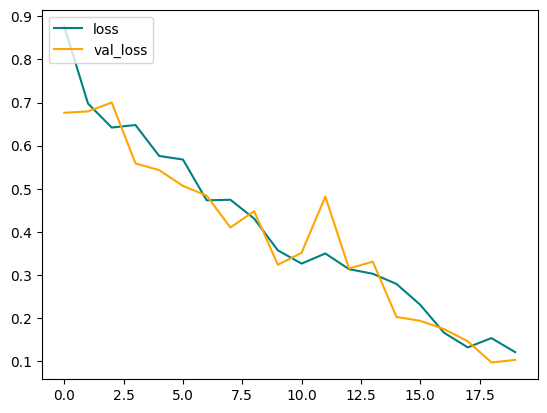

In [35]:
fir =plt.figure()
plt.plot(host.history['loss'],color='teal',label='loss')
plt.plot(host.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show  

<function matplotlib.pyplot.show(close=None, block=None)>

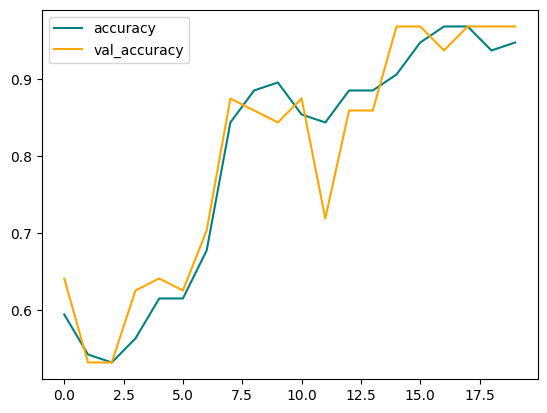

In [36]:
fir =plt.figure()
plt.plot(host.history['accuracy'],color='teal',label='accuracy')
plt.plot(host.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show  

## Evaluate Performance

In [37]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
len(test)

0

In [40]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

In [41]:
print(f'Precision is : {pre.result()},Recall is : {re.result()}, accuracy is :{acc.result()}')

Precision is : 0.0,Recall is : 0.0, accuracy is :0.0


## Test

In [42]:
import cv2

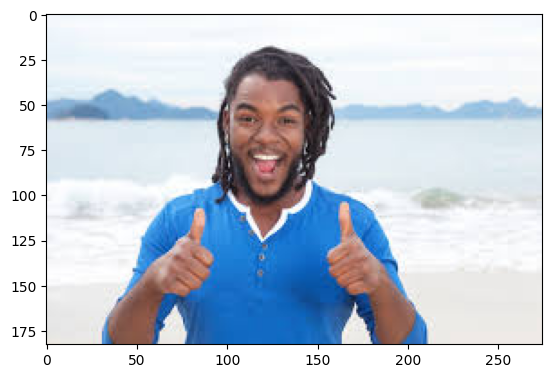

In [74]:
img = cv2.imread('happy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

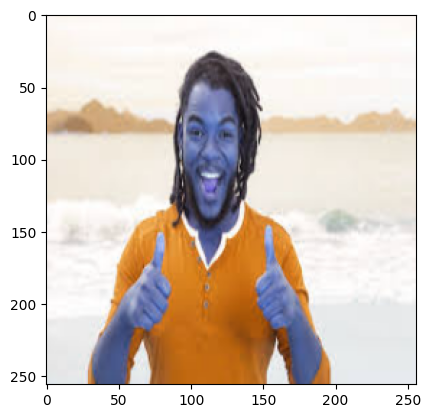

In [75]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 40ms/step


In [77]:
yhat

array([[0.08301573]], dtype=float32)

In [78]:
if yhat > 0.5:
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is happy')
    

Predicted Class is happy


# Save Model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','ImageClassify.h5'))

In [59]:
os.path.join('models','ImageClassify.h5')

'models\\ImageClassify.h5'

In [60]:
new_model = load_model(os.path.join('models','ImageClassify.h5'))

In [62]:
new_yhat=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 26ms/step


In [63]:
if yhat > 0.5:
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is happy')
    

Predicted Class is happy
